In [458]:
import pandas as pd
import numpy as np

In [459]:
# 攻擊2，守備2 數值加成
# 攻擊1，守備1 百分比加成

# 武勇=部队显示武勇 统率=部队显示统率
# 决定方式=[大将武勇, (各副将武勇*大将统率(max=100)/100)]的最高值



# 攻击力=武勇+额外强化 (内政设施+城池改修+阵营+挟击+政策+武将特性+天守补给+etc)
# 狩场效果上限8个, 阵营效果=阵营等级(0~2)*(基本值25+政策与武将特性的阵强化效果),
# 例如”火器集中运用”有阵营效果+30, 在2级阵就是加60
# 挟击效果=(基本值10+武将特性效果)*(挟击部队or方向数?) (尚不确定, 需更多测试)
# 武将特性: 特性的攻击力提升效果(van修改器中的效果5)
# 毅力/独眼龙=每经过1天, 攻击力+1, 急躁=每经过1天, 攻击力减-1
# 各种效果的具体数值可用van修改器查看

# 防御力=统率+额外强化
# 阵营效果, 毅力/独眼龙/急躁效果与攻击力相同, 武将特性的防御力提升效果是van修改器中的效果6

# (武勇与攻击力来自攻击方, 统率与防御力来自防守方)
# A=(武勇 -统率) (如果低于0则A=0, 高于0则A的最小值是(武勇 - 统率)/2+ 10)
# B=(A+攻击力) * (A+防御力+攻击力)*50/ (防御力^2)

X * (X + f) * 50 / f^2
(x^2/f^2 + x/f) * 50


# 此B值再与双方兵力做计算(基本上是乘除计算), 并且B限定在25~200, 这就是攻击力溢出不增加伤害的原因


# 假设B值与双方兵力计算出兵力伤害量C, 最终兵力伤害=C*(双方武将特性的伤害增减%效果)*(突击/齐射倍率)


# 基础伤害=双方总兵力/10k*240+148
# 双方兵力是1k时，基础伤害是172；2k时，196；5k时268；8k时，340；
# 双方兵力是10k时，基础伤害是388；20k时，628；40k时1108，60k时1588。

# 总伤害=[(基础伤害-100)*(1+加成1)+100]*(1+加成2)* (1+加成3)
# (1+加成1) = B

In [ ]:
def calculate_damage(team_self, team_opponent):
    kill = _

def test_calculate_damage():
    team_self = Team([Warrior(x)])
    team_opponent = Team([Warrior(y)])
    assert False

## Load data

In [756]:
warriors = pd.read_excel("warriors.xlsx")
print(warriors.shape)
warriors.head(3)

(1932, 15)


,名稱,統率,武勇,智略,政治,合計,戰法,登場年,登場國,創造力,士道,成長型,信仰,出自,別名
0,織田信長,99,87,94,100,380,三段射擊,1546,尾張,100,創造,織田信長型,無,武士,NaN
1,柴田勝家,87,92,68,66,313,瓶割,1537,尾張,25,名,鬼型,佛教,武士,NaN
2,前田利家,80,84,71,78,313,槍之又左,1553,尾張,70,名,前田利家型,佛教,武士,NaN


In [916]:
warrior_types = pd.read_excel("warrior_types.xlsx")
print(warrior_types.shape)
warrior_types.head(3)

(103, 25)


,成長型,初始特性,統率+05,統率+10,統率+20,武勇+05,武勇+10,武勇+20,統武+04,統武+08,...,政治+10,政治+20,知政+04,知政+08,知政+16,四圍+03,四圍+09,四圍+15,類型全特性,類型戰鬥特性
0,中庸型,NaN,疾行,NaN,NaN,氣勢,NaN,NaN,NaN,不屈,...,NaN,NaN,NaN,跋涉長途,NaN,NaN,NaN,識破,"疾行,氣勢,不屈,策士,幹練,跋涉長途,識破","氣勢,不屈"
1,統率型,NaN,疾行,電光石火,NaN,氣勢,NaN,NaN,槍衾,NaN,...,NaN,NaN,治水巧者,NaN,NaN,NaN,NaN,名將,"電光石火,氣勢,槍衾,衝鋒,策士,幹練,治水巧者,名將","氣勢,槍衾,衝鋒,名將"
2,武勇型,NaN,疾行,NaN,NaN,氣勢,捨身,NaN,鐵壁,NaN,...,NaN,NaN,治水巧者,NaN,NaN,NaN,NaN,猛將,"疾行,捨身,鐵壁,猛攻,策士,幹練,治水巧者,猛將","捨身,鐵壁,猛攻,猛將"


In [758]:
skills = pd.read_excel("skills.xlsx")
print(skills.shape)
skills.head(3)

(98, 18)


,名稱,系統,覆蓋,兵數,發動時機,發動率,持續時間,攻擊1,守備1,攻擊2,守備2,移動,形態,夾擊,腰兵糧,士氣,陣,說明
0,疾行,統率,NaN,NaN,行軍,NaN,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,部隊移動速度略微上升。
1,電光石火,統率,疾行,NaN,行軍,NaN,0.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,部隊移動速度上升。
2,神速,統率,電光石火,NaN,行軍,NaN,0.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,部隊移動速度大幅上升。


In [759]:
# skills_battle = skills[["攻擊1", "守備1", "攻擊2", "守備2"]]
# skills_idx_battle = skills_battle.dropna(how="all").index
# skills_battle = skills.loc[skills_idx_battle]
# not_interested = ["攻城專家", "進攻彈正", "守城專家", "殿軍佐久間", "逃走彈正", "海戰名人", "鐵甲船", "識破", "捨奸", "槍術", "槍彈正", "百萬一心", "下剋上"]
# skills_battle = skills_battle[~skills_battle["名稱"].isin(not_interested)]
# skills_battle.to_excel("skills_battle.xlsx", index=False)

skills_battle = pd.read_excel("skills_battle.xlsx")
print(skills_battle.shape)
skills_battle.head(3)

(44, 18)


,名稱,系統,覆蓋,兵數,發動時機,發動率,持續時間,攻擊1,守備1,攻擊2,守備2,移動,形態,夾擊,腰兵糧,士氣,陣,說明
0,衝鋒,統率,NaN,NaN,戰鬥,20.0,1,10.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,部隊攻擊力偶爾會因敵我統率差距而上升。
1,槍衾,統率,NaN,NaN,戰鬥,20.0,1,NaN,10.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,部隊守備力偶爾會因敵我統率差距而上升。
2,名將,統率,NaN,NaN,行軍,5.0,10,NaN,NaN,NaN,20.0,NaN,-20.0,NaN,NaN,NaN,NaN,更改形態時間會偶爾增加，相對的則是守備力大幅上升。


In [760]:
# warrior_types.drop(columns="類型戰鬥特性", inplace=True)
# def agg_skills(s):
#     t = s[0]
#     s = s[1:-1]
#     str_skills = s.str.cat(sep=",").replace("、", ",").replace(" ", "")
#     s_list = str_skills.split(",")
#     for s in s_list:
#         cover = skills.loc[skills["名稱"]==s, "覆蓋"].values[0]
#         s_list = [ x for x in s_list if x != cover ]
#     s_list = [x for x in s_list if x in skills_battle["名稱"].values]
        
#     return ",".join(s_list)
    
# warrior_types["類型戰鬥特性"] = warrior_types.apply(agg_skills, axis=1)
# warrior_types.to_excel("warrior_types.xlsx", index=False)

In [874]:
# warrior_details = pd.merge(warriors, warrior_types, on="成長型")
# warrior_details.to_excel("warrior_details.xlsx", index=False)
warrior_details = pd.read_excel("warrior_details.xlsx")
print(warrior_details.shape)
warrior_details.head(3)

(1932, 40)


,名稱,統率,武勇,智略,政治,合計,戰法,登場年,登場國,創造力,...,政治+20,知政+04,知政+08,知政+16,四圍+03,四圍+09,四圍+15,類型全特性,類型戰鬥特性,類型戰鬥特性合計
0,織田信長,99,87,94,100,380,三段射擊,1546,尾張,100,...,NaN,牟利專家,土木名人,NaN,信長之野望,NaN,創造,"快奔,神速,鐵甲船,神彈,兵家,能吏,牟利專家,土木名人,信長之野望,創造","神彈,信長之野望",2
1,柴田勝家,87,92,68,66,313,瓶割,1537,尾張,25,...,NaN,治水巧者,NaN,NaN,殿軍,NaN,先驅,"電光石火,背水,猛攻,鐵壁,鬼,猛將,攻城,幹練,治水巧者,殿軍,先驅","背水,猛攻,鐵壁,鬼,猛將,先驅",6
2,佐竹義重,87,90,79,83,339,坂東太郎,1562,常陸,30,...,NaN,治水巧者,NaN,NaN,殿軍,NaN,先驅,"電光石火,背水,猛攻,鐵壁,鬼,猛將,攻城,幹練,治水巧者,殿軍,先驅","背水,猛攻,鐵壁,鬼,猛將,先驅",6


## Find warriors with potential

In [762]:
def __temp(x):
    if x is np.nan:
        return 0
    else:
        return len(x)

warrior_details["battle_skills_count"] = warrior_details["類型戰鬥特性"] \
    .str \
    .split(",") \
    .apply(__temp)
warrior_details.head(3)

,名稱,統率,武勇,智略,政治,合計,戰法,登場年,登場國,創造力,...,政治+20,知政+04,知政+08,知政+16,四圍+03,四圍+09,四圍+15,類型全特性,類型戰鬥特性,battle_skills_count
0,織田信長,99,87,94,100,380,三段射擊,1546,尾張,100,...,NaN,牟利專家,土木名人,NaN,信長之野望,NaN,創造,"快奔,神速,鐵甲船,神彈,兵家,能吏,牟利專家,土木名人,信長之野望,創造","神彈,信長之野望",2
1,柴田勝家,87,92,68,66,313,瓶割,1537,尾張,25,...,NaN,治水巧者,NaN,NaN,殿軍,NaN,先驅,"電光石火,背水,猛攻,鐵壁,鬼,猛將,攻城,幹練,治水巧者,殿軍,先驅","背水,猛攻,鐵壁,鬼,猛將,先驅",6
2,佐竹義重,87,90,79,83,339,坂東太郎,1562,常陸,30,...,NaN,治水巧者,NaN,NaN,殿軍,NaN,先驅,"電光石火,背水,猛攻,鐵壁,鬼,猛將,攻城,幹練,治水巧者,殿軍,先驅","背水,猛攻,鐵壁,鬼,猛將,先驅",6


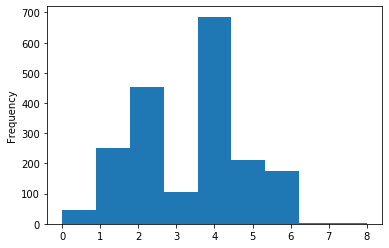

In [763]:
# warrior_details["battle_skills_count"].unique()
warrior_details["battle_skills_count"].plot(kind="hist", bins=9)

In [764]:
warrior_details["battle_skills_count"].describe()

count    1932.000000
mean        3.291408
std         1.596692
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         8.000000
Name: battle_skills_count, dtype: float64

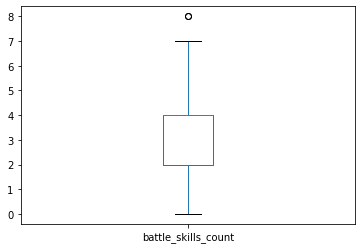

In [765]:
warrior_details["battle_skills_count"].plot(kind="box")

In [860]:
warrior_details[warrior_details["battle_skills_count"] >= 2].shape

(1635, 40)

In [917]:
# mask_t_w = (warrior_details["統率"] >= 80) & (warrior_details["武勇"] >= 80)
mask_gao_t = warrior_details["統率"] >= 85
mask_not_members = ~warrior_details["成長型"].isin(["副將型", "賢妻良母型", "片倉小十郎型"])
mask_has_to_be_leads = warrior_details["類型戰鬥特性"].astype(str).str.contains("傾奇者")
mask_leads = (mask_leads & mask_not_members) | mask_has_to_be_leads
warrior_details[
    mask_leads
].shape[0]

73

In [968]:
bad_types = [
    "內政拿手型", "政治型", "忍者型", "萬能政治型", "女性型", "古田織部型", "宰相型", "女戰國大名型", "外交僧型",
    "毛利隆元型", "不幸型", "中庸型", "猛將騎馬特化型", "捨奸型", "幸運型", "高坂昌信型", "佐久間信盛型", "信仰心型"
]

candidates = warrior_details[~warrior_details["成長型"].isin(bad_types)]


m_t = candidates["統率"] >= 65
m_w = candidates["武勇"] >= 70
m_z = candidates["智略"] >= 70
m_s_1 = warrior_details["類型戰鬥特性"].astype(str).str.contains("傾奇者")
m_s_2 = warrior_details["類型戰鬥特性"].astype(str).str.contains("真武士")
m_s_3 = warrior_details["類型戰鬥特性"].astype(str).str.contains("野戰名人")
m_s_4 = warrior_details["類型戰鬥特性"].astype(str).str.contains("內助之功")
m_s_5 = warrior_details["類型戰鬥特性"].astype(str).str.contains("副將")
m_s_6 = warrior_details["類型戰鬥特性"].astype(str).str.contains("傾城")
m_s_7 = warrior_details["類型戰鬥特性"].astype(str).str.contains("公主武者")
m_s_8 = warrior_details["類型戰鬥特性"].astype(str).str.contains("副將")
m_s_9 = warrior_details["類型戰鬥特性"].astype(str).str.contains("波狀攻擊")

candidates = candidates[
    m_t | m_w | m_z | m_s_1 | m_s_2 | m_s_3 | m_s_4 | m_s_5 | m_s_6 | m_s_7 | m_s_8 | m_s_9
]

candidates.shape

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(795, 40)

In [969]:
candidates.to_excel("candidates.xlsx", index=False)

In [963]:

# "石田三成型", 全发挥，大炮， 70， 58
# "萬能型", ym, 野名
# 女忍者型
warrior_details[warrior_details["成長型"] == "北條氏康型"].head(1)

,名稱,統率,武勇,智略,政治,合計,戰法,登場年,登場國,創造力,士道,成長型,信仰,出自,別名,初始特性,統率+05,統率+10,統率+20,武勇+05,武勇+10,武勇+20,統武+04,統武+08,統武+16,知略+05,知略+10,知略+20,政治+05,政治+10,政治+20,知政+04,知政+08,知政+16,四圍+03,四圍+09,四圍+15,類型全特性,類型戰鬥特性,類型戰鬥特性合計
20,北條氏康,95,86,90,99,370,五色備,1530,相模,50,家,北條氏康型,佛教,武士,NaN,幹練、守城,疾行,槍衾,NaN,背水,NaN,NaN,先驅,NaN,NaN,兵家,NaN,NaN,治水巧者,牟利專家,NaN,民心掌握,NaN,NaN,毅力,NaN,守城專家,"幹練,疾行,槍衾,背水,先驅,兵家,治水巧者,牟利專家,民心掌握,毅力,守城專家","槍衾,背水,先驅",3


In [923]:
# warrior_details[warrior_details["類型戰鬥特性合計"] >= 2]

In [921]:
not_leads = warrior_details[~mask_leads]
mask_gao_wz = (warrior_details["武勇"] >= 80) | (warrior_details["智略"] >= 80)
mask_skills = (warrior_details["類型戰鬥特性合計"] >= 4)
not_leads[mask_gao_wz].shape

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(180, 40)

In [927]:
warrior_details[mask_has_to_be_leads]

,名稱,統率,武勇,智略,政治,合計,戰法,登場年,登場國,創造力,...,政治+20,知政+04,知政+08,知政+16,四圍+03,四圍+09,四圍+15,類型全特性,類型戰鬥特性,類型戰鬥特性合計
12,前田利家,80,84,71,78,313,槍之又左,1553,尾張,70,...,NaN,NaN,牟利專家,NaN,猛將,NaN,名將,"槍術,傾奇者,電光石火,氣勢,背水,衝鋒,槍衾,先驅,策士,能吏,牟利專家,猛將,名將","傾奇者,氣勢,背水,衝鋒,槍衾,先驅,猛將,名將",8
1793,前田慶次,67,83,63,32,245,全紅之槍,1558,尾張,90,...,NaN,NaN,NaN,NaN,幸運,NaN,虎,"沾潤,馬術,槍術,傾奇者,神速,猛攻,鐵壁,猛將,攻城,野戰名人,幸運,虎","馬術,傾奇者,猛攻,鐵壁,猛將,野戰名人,虎",7
1794,名古屋山三郎,53,80,69,12,214,叫陣,1415,山城,80,...,NaN,NaN,NaN,NaN,幸運,NaN,虎,"沾潤,馬術,槍術,傾奇者,神速,猛攻,鐵壁,猛將,攻城,野戰名人,幸運,虎","馬術,傾奇者,猛攻,鐵壁,猛將,野戰名人,虎",7
1902,出雲阿國,78,71,74,48,271,挑釁,1415,山城,90,...,NaN,民心掌握,NaN,NaN,八面玲瓏,NaN,幸運,"沾潤,公主武者,傾奇者,疾行,捨身,俘虜,策士,幹練,民心掌握,八面玲瓏,幸運","公主武者,傾奇者,捨身",3


In [890]:
# mask_t_w = (warrior_details["統率"] >= 80) & (warrior_details["武勇"] >= 80)
mask_t = (warrior_details["統率"] >= 80) & (~warrior_details["成長型"].isin(["副將型", "賢妻良母型", "片倉小十郎型"]))
print('统武双80的人有', warrior_details[mask_t_w].shape[0])
print('统>85', warrior_details[mask_t].shape[0])

mask_7_8 = warrior_details["類型戰鬥特性合計"] >= 7
mask_6 = warrior_details["類型戰鬥特性合計"] == 6
mask_5 = warrior_details["類型戰鬥特性合計"] == 5
mask_4 = warrior_details["類型戰鬥特性合計"] == 4

print('有7个以上战斗特性的人有', warrior_details[mask_7_8].shape[0], '4人统武双80')
print('有6个战斗特性的人有', warrior_details[mask_6].shape[0])
print('有5个战斗特性的人有', warrior_details[mask_5].shape[0])
print('有4个战斗特性的人有', warrior_details[mask_4].shape[0])


warrior_details[mask_4]

统武双80的人有 65
统>85 100
有7个以上战斗特性的人有 6 4人统武双80
有6个战斗特性的人有 175
有5个战斗特性的人有 210
有4个战斗特性的人有 686


,名稱,統率,武勇,智略,政治,合計,戰法,登場年,登場國,創造力,...,政治+20,知政+04,知政+08,知政+16,四圍+03,四圍+09,四圍+15,類型全特性,類型戰鬥特性,類型戰鬥特性合計
13,明智光秀,95,85,93,91,364,瞄準射擊,1543,美濃,55,...,NaN,民心掌握,NaN,NaN,神彈,NaN,名將,"外交術,電光石火,氣勢,下剋上,策士,智將,宰相,密使,民心掌握,神彈,名將","氣勢,智將,神彈,名將",4
25,真田昌幸,94,85,98,83,360,表裏比興,1562,北信濃,30,...,NaN,神算,NaN,智將,鬼謀,NaN,守城專家,"策士,外交術,電光石火,氣勢,築城名手,軍略家,能吏,神算,智將,鬼謀,守城專家","氣勢,神算,智將,鬼謀",4
169,本願寺顯如,85,63,88,97,333,連環射擊,1555,攝津,5,...,NaN,牟利專家,外交術,NaN,封殺,慧眼,幸運,"民心掌握,信仰心,疾行,氣勢,堅守,槍衾,兵家,能吏,牟利專家,外交術,封殺,慧眼,幸運","信仰心,氣勢,槍衾,封殺",4
170,今川義元,93,67,87,98,345,連環射擊,1536,駿河,50,...,宰相,治水巧者,民心掌握,NaN,NaN,名將,幸運,"外交術,電光石火,氣勢,波狀攻擊,槍衾,軍略家,宰相,治水巧者,民心掌握,名將,幸運","氣勢,波狀攻擊,槍衾,名將",4
363,松永久秀,82,67,93,90,332,阻撓,1526,大和,70,...,NaN,外交術,NaN,民心掌握,智將,NaN,八面玲瓏,"策士,毅力,疾行,氣勢,俘虜,軍略家,鬼謀,神算,能吏,外交術,民心掌握,智將,八面玲瓏","氣勢,鬼謀,神算,智將",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,阿船,72,71,61,64,268,急襲,1557,南越後,25,...,宰相,民心掌握,牟利專家,密使,神算,NaN,鬼謀,"幸運,內助之功,疾行,捨身,堅守,策士,宰相,民心掌握,牟利專家,密使,神算,鬼謀","內助之功,捨身,神算,鬼謀",4
1923,阿松,71,66,83,76,296,激勵,1547,尾張,85,...,宰相,民心掌握,牟利專家,密使,神算,NaN,鬼謀,"幸運,內助之功,疾行,捨身,堅守,策士,宰相,民心掌握,牟利專家,密使,神算,鬼謀","內助之功,捨身,神算,鬼謀",4
1924,寧寧,83,73,61,70,287,激勵,1547,尾張,85,...,宰相,民心掌握,牟利專家,密使,神算,NaN,鬼謀,"幸運,內助之功,疾行,捨身,堅守,策士,宰相,民心掌握,牟利專家,密使,神算,鬼謀","內助之功,捨身,神算,鬼謀",4
1925,歸蝶,82,78,62,80,302,神速,1531,美濃,70,...,宰相,密使,民心掌握,NaN,神算,NaN,下剋上,"傾城,疾行,捨身,鬼謀,堅守,策士,軍略家,幹練,宰相,密使,民心掌握,神算,下剋上","傾城,捨身,鬼謀,神算",4


In [859]:
# warrior_details.rename(columns={"battle_skills_count": "類型戰鬥特性合計"}).to_excel("warrior_details.xlsx", index=False)

In [769]:
s_zhentianchangxing = warrior_details.loc[25]
s_zhentianchangxing[["統率", "武勇", "智略", "類型全特性"]]

統率                                             94
武勇                                             85
智略                                             98
類型全特性    策士,外交術,電光石火,氣勢,築城名手,軍略家,能吏,神算,智將,鬼謀,守城專家
Name: 25, dtype: object

In [770]:
s_zhentianxingcun = warrior_details.loc[26]
s_zhentianxingcun[["統率", "武勇", "智略", "類型全特性"]]

統率                                           92
武勇                                           99
智略                                           82
類型全特性    電光石火,捨身,猛攻,赤備,奮不顧身,真武士,策士,能吏,野戰名人,守城專家
Name: 26, dtype: object

In [844]:
traits_default = pd.read_excel("traits_default.xlsx")

In [845]:
# traits_default.to_excel("traits_default.xlsx", index=False)

In [846]:
# traits_default.loc[traits_default["name"].isin(["堅陣"]), "on_bigger_troops"] = True
# traits_default.loc[27, "activated_on_battle"] = False

In [970]:
now()

NameError: name 'now' is not defined

In [972]:
import datetime
print(datetime.datetime.now())

2020-11-23 20:20:55.467676


In [973]:
a = np.nan

In [974]:
a

nan

In [978]:
2 is not np.nan

True

In [985]:
df.index

Int64Index([0, 1, 2, -1], dtype='int64')

In [984]:
s = df.loc[1]

Index(['rate', 'activated'], dtype='object')

In [983]:
df[~s.index]

TypeError: bad operand type for unary ~: 'Index'